# 📘 Kombinert analyse av Frost API og NILU API

Denne notebooken undersøker hvordan ulike værforhold påvirker luftkvaliteten i Norge, med særlig fokus på temperatur og vindhastighet i sammenheng med konsentrasjoner av NO₂ (nitrogendioksid) og O₃ (ozon).

Vi kombinerer tidligere presenterte målinger fra to miljøedatakilder:
- **Frost API** - værdata fra Meterologisk institutt 
- **NILU API** - luftkvalitetsdata fra NOrsk institutt for luftforskning.

Formålet er å analysere hvordan meterologiske faktorer kan påvirke luftforurensningen, og om det finnes tydelige mønstre eller korrelasjoner som kan visualiseres og tolkes. 

#### Mål for analysen:
- Kombinere meteorlogiske og luftkvalitetsdata 
- Visualisere samvariasjon mellom temperatur og NO₂ over tid
- Utføre korrelasjonsanalyse mellom:
    - Temperatur og O₃ 
    - Vindhastighet og NO₂
- Tolke resultatene i lys av kjente meteorologiske og miljømessige forhold


----------------------------------------------------------------

## Visualisering av sammenhengen mellom luftkvalitet og temperatur

#### Introduksjon til datasettet og visualiseringen

Denne koden leser inn to miljødatakilder:
- Meteorologiske data (temperatur) fra Meteorologisk institutt (Frost API)
- Luftkvalitetsmålinger (NO₂) fra Norsk institutt for luftforskning (NILU)

Begge datasettene inneholder en `Dato`-kolonne og kombineres gjennom en **indre join**, slik at kun datoer med data i begge kilder benyttes. Den resulterende datastrukturen benyttes til å visualisere **temperatur** og **NO₂-konsentrasjon** over tid i én felles graf med to y-akser.

#### Formål og nytteverdi

Denne typen visualisering gir en oversikt over hvordan temperatur og luftforurensning (her representert ved nitrogendioksid – NO₂) utvikler seg over tid, og legger til rette for å identifisere mulige sammenhenger mellom meteorologiske forhold og luftkvalitet.

Spesielt er det nyttig å undersøke:
- Sesongvariasjoner i luftforurensning
- Samvariasjon mellom kaldt vær og forhøyede NO₂-nivåer
- Trender og avvik som kan indikere behov for tiltak eller videre analyser

#### Hvorfor er NO₂ ofte høyere ved lavere temperaturer?

Ved kalde temperaturer – spesielt om vinteren – forekommer det ofte meteorologiske fenomener som **temperaturinversjon**. Dette skjer når et kaldt luftlag nær bakken fanges under et varmere luftlag høyere oppe. Inversjonen fungerer som et **lokk** som hindrer vertikal sirkulasjon i atmosfæren, og forurensning fra biltrafikk og annen forbrenning får ikke anledning til å spre seg eller løftes bort.

Konsekvensene av dette inkluderer:
- Akkumulering av NO₂ og andre forurensende stoffer nær bakkenivå
- Dårligere luftkvalitet i befolkningstette områder, spesielt i byer og dalfører
- Økt helserisiko, spesielt for utsatte grupper som barn, eldre og personer med luftveissykdommer

Ved å sammenligne NO₂ og temperatur visuelt i én graf, blir det lettere å identifisere slike mønstre og forstå **hvordan værforhold påvirker luftforurensningen**.

#### Fordeler ved valgt visualiseringsmetode

- Bruk av to y-akser muliggjør en **intuitiv og presis sammenligning** mellom to dataserier med ulik skala.
- Tidslinjeformatet gir god **oversikt over utvikling og sesongvariasjon**.
- Bruk av farge og interaktive elementer gjør grafen **lett å lese og tolke**, også for ikke-eksperter.

Denne typen fremstilling er et nyttig verktøy for både forskere, forvaltningsorgan og beslutningstakere som arbeider med klima, byplanlegging eller folkehelse.


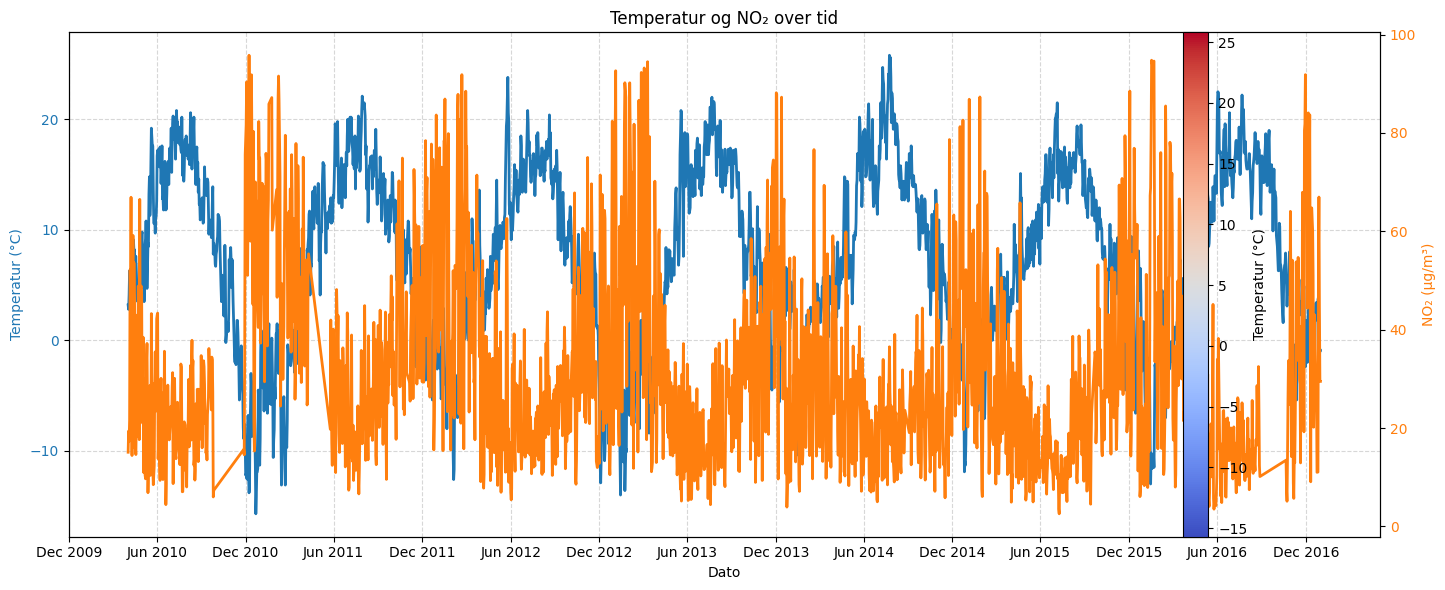

In [5]:
import sys

sys.path.insert(0, '../src/')
from kombinert_analyse import load_merge_and_plot_no2_temp
load_merge_and_plot_no2_temp()


---
## Videre analyse: Temperatur og O₃, Vindhastighet og NO₂

Vi går videre med en korrelasjonsanalyse for å undersøke hvorvidt det finnes statistiske sammenhenger mellom:
- Temperatur og ozon (O₃) 
- Vindhastighet og nitrogendioksid (NO₂) 

Målet er å kvantifisere og visualisere hvordan disse meteorologiske faktorene påvirker luftkvaliteten. 

##### <u>Korrelasjonsanalyse med Pearson-koeffisienten</u>:

Resultater fra beregningen viser:

| Variabelpar              | Pearson-korrelasjon |
|--------------------------|---------------------|
| Temperatur og O₃         | 0,315               |
| Vindhastighet og NO₂     | -0,56               |


##### <u>Tolkning</u>:

En korrelasjon på **0,315** tilsier en moderat positiv sammenheng mellom temperatur og ozon-nivå. Funnet tilsier at ozon dannes lettere på varme dager. Årsaken til dette er at ozon ved bakkeplan dannes gjennom fotokjemiske reaksjoner drevet av sollys. På solrike, varmedager, spesielt i urbane områder med mye trafikk, kan altså bakkenært ozon nå høye konsentrasjoner. 

En korrelasjon på **-0,56** tilsier en moderat til sterk negativ sammenheng. Funnet tilsier at vind bidrar til å spre forurensning (spesielt NO2) og det er derfor lavere konsentrasjoner lokalet ved høy vindhastighet. 

*Disse funnene er i tråd med forventede meteorologiske effekter.*

##### <u>Visualisering</u>:

Scatterplottet viser korrelassjonsfunnene visuelt:
- Scatterplottet for temperatur og ozon viser en tendens til høyere ozon-nivå ved høyere temperatur. 
- Scatterplottet for vindhastighet og NO2 viser en negativ trend hvor høyere vind gir lavere NO2. 


      Temperatur   Verdi_O3
0           25.8  38.750000
1           25.6  46.554167
2           24.7  47.904167
3           24.5  50.766667
4           24.1  53.200000
...          ...        ...
2461       -13.6  21.062500
2462       -13.8  59.408270
2463       -14.0  25.820833
2464       -14.1  59.841476
2465       -15.7  59.812595

[2466 rows x 2 columns]
      Vindhastighet  Verdi_NO2
0               6.2  14.058333
1               6.2  12.108333
2               6.2  12.650000
3               6.1  29.375000
4               6.1  13.650000
...             ...        ...
2461            0.6  62.052577
2462            0.6  78.366667
2463            0.6  78.195833
2464            0.6  88.712500
2465            0.6  48.716667

[2466 rows x 2 columns]
Korrelasjon mellom Temperatur og Verdi_O3: 0.315837312593607
Korrelasjon mellom Vindhastighet og Verdi_NO2: -0.5600926726837975


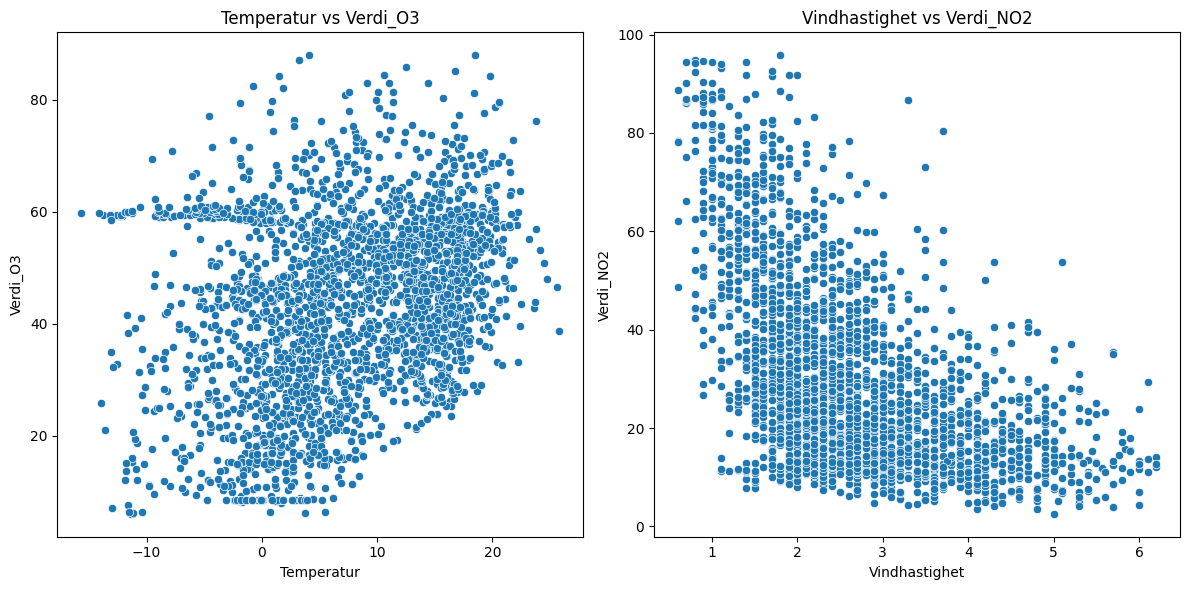

(      Temperatur   Verdi_O3
 0           25.8  38.750000
 1           25.6  46.554167
 2           24.7  47.904167
 3           24.5  50.766667
 4           24.1  53.200000
 ...          ...        ...
 2461       -13.6  21.062500
 2462       -13.8  59.408270
 2463       -14.0  25.820833
 2464       -14.1  59.841476
 2465       -15.7  59.812595
 
 [2466 rows x 2 columns],
       Vindhastighet  Verdi_NO2
 0               6.2  14.058333
 1               6.2  12.108333
 2               6.2  12.650000
 3               6.1  29.375000
 4               6.1  13.650000
 ...             ...        ...
 2461            0.6  62.052577
 2462            0.6  78.366667
 2463            0.6  78.195833
 2464            0.6  88.712500
 2465            0.6  48.716667
 
 [2466 rows x 2 columns],
 np.float64(0.315837312593607),
 np.float64(-0.5600926726837975))

In [12]:
# Beregner og visualiserer korrelasjonen mellom ulike værdata  
from sql_analysis import analyze_frost_nilu
analyze_frost_nilu()

---
## Konklusjon av kombinert analyse

Den kombinerte analysen viser at det finnes målbare sammenhenger mellom vær og luftkvalitet:
- **Kaldt vær** (inversjoner) fører til opphopning av NO₂
- **Høye temperaturer** gir økt ozonproduksjon
- **Vind** spiller en viktig rolle i å redusere lokal luftforurensning

Kombinasjonen av datakilder og visualisering gir verdifull innsikt som kan bidra til bedre luftkvalitetsvarsling, planlegging av tiltak, og informert politikk innen miljø og helse.

---
[⬅️ Forrige: NILU-analyse](niluAPI/niluAPI.ipynb)